# MILESTONE 2

## i. Perkenalan

### Muhammad Fadhil Sadeli
### BATCH 002

## ii. Import Libraries

`Memasukkan library yang digunakan`

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as imbpipe
import pickle

np.random.seed(42)
tf.random.set_seed(42)

`mendownload dataset menggunakan api kagle`

In [2]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!cp /content/kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d blastchar/telco-customer-churn

telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip -q /content/telco-customer-churn.zip -d dataset

replace dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## iii. Data Loading

`Import dataset`

In [7]:
data = pd.read_csv('/content/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


`Mengecek informasi data`

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


`Mencari missing value pada data`

In [11]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

`Mencari berapa banyak baris data yang duplicate`

In [12]:
data[data.duplicated()].shape

(0, 21)

`Mencari jumlah masing masing unique value di setiap kolomnya` 

In [13]:
for i in data.columns.tolist():
    print(f'num of unique label in {i}: ', len(data[i].unique()))

num of unique label in customerID:  7043
num of unique label in gender:  2
num of unique label in SeniorCitizen:  2
num of unique label in Partner:  2
num of unique label in Dependents:  2
num of unique label in tenure:  73
num of unique label in PhoneService:  2
num of unique label in MultipleLines:  3
num of unique label in InternetService:  3
num of unique label in OnlineSecurity:  3
num of unique label in OnlineBackup:  3
num of unique label in DeviceProtection:  3
num of unique label in TechSupport:  3
num of unique label in StreamingTV:  3
num of unique label in StreamingMovies:  3
num of unique label in Contract:  3
num of unique label in PaperlessBilling:  2
num of unique label in PaymentMethod:  4
num of unique label in MonthlyCharges:  1585
num of unique label in TotalCharges:  6531
num of unique label in Churn:  2


`Mencari informasi lebih mengenai data numerik`

In [14]:
data.describe( )

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


`Dilihat dari hasil informasinya, seharusnya kolom total charges juga dapat dilihat informasinya`

`Selanjutnya mencari informasi lebih seluruh kolom data`

In [15]:
data.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


`Dilihat dari kolom total charges terdapat anomali pada bagian top yang terisi kosong atau spasi, hal tersebut menandakan adanya missing value pada kolom total charges`

In [16]:
data['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

`Selanjutnya mencari baris apa saja yang mempunyai anomali pada kolom total charges`

In [17]:
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


`Describe`

1. customerID - nilai unik yang mengidentifikasi pelanggan
2. gender - apakah pelanggan adalah laki-laki atau perempuan
3. SeniorCitizen - apakah pelanggan adalah warga senior atau bukan (1, 0)
4. Partner - apakah pelanggan memiliki mitra atau tidak (Ya, Tidak)
5. Dependents - apakah pelanggan memiliki tanggungan atau tidak (Ya, Tidak).dependents adalah orang yang bergantung pada orang lain sebagai sumber pendapatan utama
6. tenure - jumlah bulan pelanggan telah tinggal dengan perusahaan
7. PhoneService - apakah pelanggan memiliki layanan telepon atau tidak (Ya, Tidak)
8. MultipleLines - apakah pelanggan memiliki banyak saluran atau tidak (Ya, Tidak, Tidak ada layanan telepon)
9. InternetService - penyedia layanan internet pelanggan (DSL, Fiber optic, No)
10. OnlineSecurity - apakah pelanggan memiliki keamanan online atau tidak (Ya, Tidak, Tidak ada layanan internet)
11. OnlineBackup - apakah pelanggan memiliki cadangan online atau tidak (Ya, Tidak, Tidak ada layanan internet)
12. DeviceProtection - apakah pelanggan memiliki perlindungan perangkat atau tidak (Ya, Tidak, Tidak ada layanan internet)
13. TechSupport - apakah pelanggan memiliki dukungan teknis atau tidak (Ya, Tidak, Tidak ada layanan internet)
14. StreamingTV - apakah pelanggan memiliki streaming TV atau tidak (Ya, Tidak, Tidak ada layanan internet)
15. StreamingMovies - apakah pelanggan memiliki streaming film atau tidak (Ya, Tidak, Tidak ada layanan internet)
16. Contract  - jenis kontrak menurut durasi (Bulan ke bulan, Satu tahun, Dua tahun)
17. PaperlessBilling - tagihan diterbitkan dalam bentuk tanpa kertas (Ya, Tidak)
18. PaymentMethod - metode pembayaran yang digunakan oleh pelanggan (Electronic check, Mailed check, Kartu kredit (otomatis), Transfer bank (otomatis))
19. MonthlyCharges - jumlah biaya untuk layanan pada basis bulanan
20. TotalCharges  - biaya kumulatif untuk layanan selama periode berlangganan (masa kerja).
21. Churn – nilai keluaran, variabel prediksi

`Berdasarkan general overview yang didapat:`

- Pada data Telco Customer Churn tidak mempunyai duplicate data.
- Pada data tersebut mempunyai kolom Customer ID yang tidak digunakan karena kolom tersebut hanya merepresentasikan index saja. Sehingga akan didrop pada cleaning section
- Baris dan kolom pada data flight price sebanyak 7043 baris dan 20 kolom
- Kolom tenure merupakan kolom kategorikal dikarenakan unique valuenya berisi mengenai jumlah pelanggan yang telah meninggalkan perusahaan
- Kolom target atau kolom yang akan diprediksi nantinya adalah kolom churn
- Kolom target masih berupa string, maka sebelum nanti displit datanya, dilakukan ordinal encoding pada cleaning section
- Pada kolom total charges mempunyai missing value sebanyak 11 baris
- Missing value tersebut akan diimputasi pada cleaning section

## Data cleaning

In [18]:
data_clean = data.copy()

`Mendrop kolom customer ID`

In [19]:
data_clean.drop(columns=['customerID'],axis=1,inplace=True)

`Mengganti anomali spasi menjadi numerik pada kolom total charges agar terdeteksi missing valuenya`  

In [20]:
data_clean['TotalCharges']=pd.to_numeric(data_clean['TotalCharges'],errors='coerce')

`Selanjutnya mengecek apakah sudah terdeteksi atau belum mising valuenya`

In [21]:
data_clean.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

`Selanjutnya mengencoding kolom target dari string menjadi binary atau numerik`

In [22]:
data_clean['Churn'] = data_clean['Churn'].replace({'No': 0,'Yes': 1})
data_clean['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [23]:
data_clean.shape

(7043, 20)

## iv. Exploratory Data Analysis (EDA)

In [24]:
df_analysis = data_clean.copy()

`Selanjutnya memvisualisasi perbandingan kelas no dan kelas yes pada kolom target`

Text(0.5, 0, 'Churn')

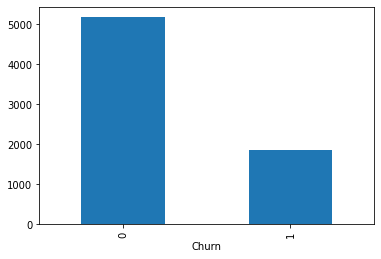

In [25]:
df_analysis['Churn'].value_counts().plot(kind='bar')
plt.xlabel("Churn")

`Dilihat dari hasil plotnya, kolom target mempunyai data yang imblance. Sehingga nanti akan dilakukan handle imbalance data akhir preprocessing`

`Selanjutnya memvisualisasi payment method berdasarkan churnnya`

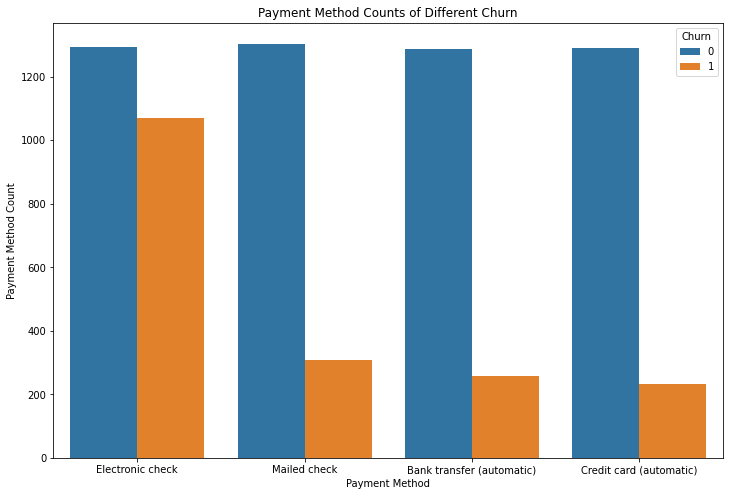

In [26]:
plt.figure(figsize = (12, 8))
sns.countplot(data=df_analysis,x = 'PaymentMethod', hue = 'Churn')
plt.title('Payment Method Counts of Different Churn')
plt.xlabel("Payment Method")
plt.ylabel("Payment Method Count")
plt.show();

`Dilihat dari hasil plotnya, metode pembayaran dengan elektronik check menjadi metode pembayaran yang paling sering digunakan pada customer yang churn `

`Selanjutnya memvisualisasi gender berdasarkan churnnya`

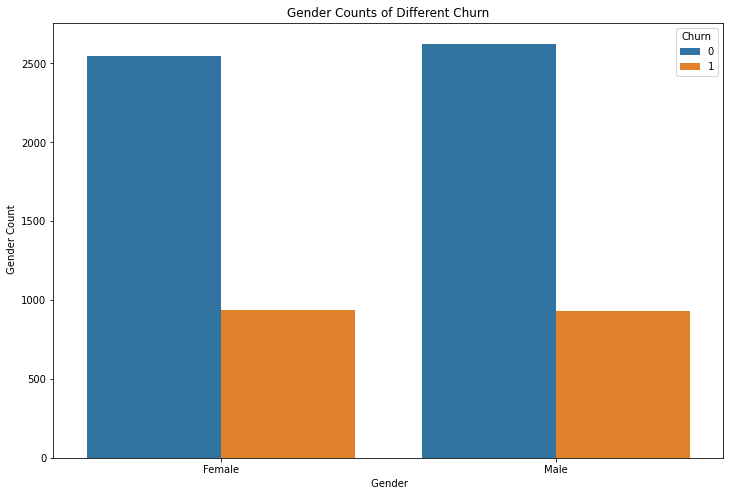

In [27]:
plt.figure(figsize = (12, 8))
sns.countplot(data=df_analysis,x = 'gender', hue = 'Churn')
plt.title('Gender Counts of Different Churn')
plt.xlabel(" Gender")
plt.ylabel(" Gender Count")
plt.show();

`Dilihat dari hasil plotnya, jenis kelamin laki laki maupun perempuan mempunyai jumlah yang sama berdasarkan churnnya. Jika dilihat hasil EDAnya Kolom gender tidak mempengaruhi seseorang tersebut churn atau tidak`

`Selanjutnya memvisualisasi kolom contract berdasarkan churnnya`

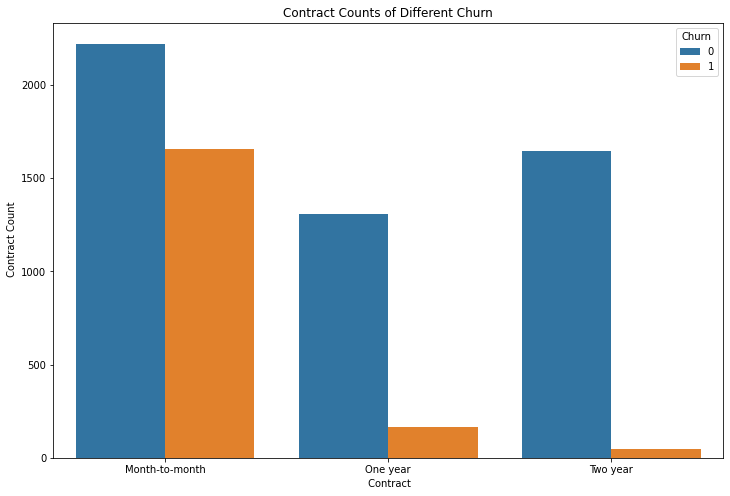

In [28]:
plt.figure(figsize = (12, 8))
sns.countplot(data=df_analysis,x = 'Contract', hue = 'Churn')
plt.title('Contract Counts of Different Churn')
plt.xlabel(" Contract")
plt.ylabel(" Contract Count")
plt.show();

`Berdasarkan hasil visualisasi diatas, contract month to month adalah yang paling sering muncul baik seseorang tersebut churn atau tidak`

`Selanjutnya memvisualisasi kolom internet service`

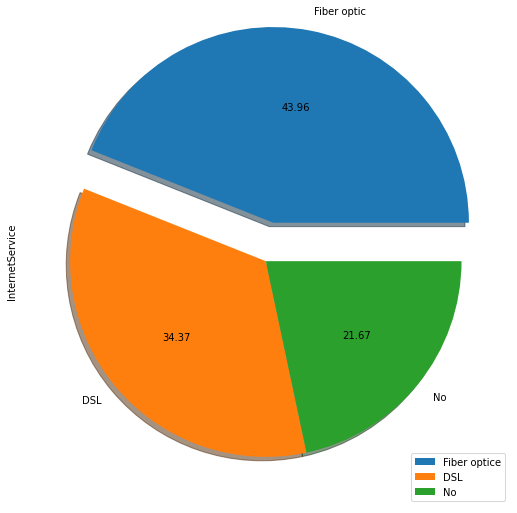

In [29]:
plt.figure(figsize = (9,9),facecolor='white')
df_analysis['InternetService'].value_counts().plot(kind = 'pie',explode = [0.2,0.0,0.0], shadow = True,autopct = "%.2f")
plt.legend(['Fiber optice', 'DSL','No'])
plt.show()

`Dilihat dari hasil visualisasinya, internet service fiber optic yang paling sering digunakan dibanding yang lainnya`

### Split

`Lalu, Data dibagi menjadi 2, x untuk feature dan y untuk target. Setelah data x dan y yang sudah didefinisikan, maka selanjutnya data tersebut displit menjadi 2 yaitu data train sebanyak 90% dan data test sebanyak 10%. Lalu data train dibagi lagi menjadi 80%, 20% untuk data validasi `

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data_clean.drop(columns='Churn'), data_clean['Churn'], train_size=0.9, stratify=data_clean['Churn'])
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.8, stratify=y_train)

`Selanjutnya mengecek apakah bentuk datanya udh sesuai apa belum`

In [31]:
for i in [X_train, X_test, X_val, y_train, y_test, y_val ]:
    print(i.shape)

(5070, 19)
(705, 19)
(1268, 19)
(5070,)
(705,)
(1268,)


`Dilihat dari bentuk datanya, data yg sudah displit sudah mempunyai baris yang sama di data x train dan y train, begitu juga dengan x test dan y test dan juga x val dan y val`

In [32]:
df_eda = pd.concat([X_train, y_train], axis=1)

df_eda.shape

(5070, 20)

`Lalu digabung data x train atau fitur dengan y train atau target untuk digunakan saat EDA modeling` 

### Exploratory Data Analysis (EDA) Modeling

In [33]:
for i in df_eda.columns.tolist():
    print(f'num of unique label in {i}: ', len(df_eda[i].unique()))

num of unique label in gender:  2
num of unique label in SeniorCitizen:  2
num of unique label in Partner:  2
num of unique label in Dependents:  2
num of unique label in tenure:  73
num of unique label in PhoneService:  2
num of unique label in MultipleLines:  3
num of unique label in InternetService:  3
num of unique label in OnlineSecurity:  3
num of unique label in OnlineBackup:  3
num of unique label in DeviceProtection:  3
num of unique label in TechSupport:  3
num of unique label in StreamingTV:  3
num of unique label in StreamingMovies:  3
num of unique label in Contract:  3
num of unique label in PaperlessBilling:  2
num of unique label in PaymentMethod:  4
num of unique label in MonthlyCharges:  1422
num of unique label in TotalCharges:  4775
num of unique label in Churn:  2


`Selanjutnya memisahkan kolom numerikal dan kategorikal`

In [34]:
num_col = [ 'MonthlyCharges','TotalCharges'] 
cat_col = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'] 
target = ['Churn']

### Categorical Features

In [35]:
df_eda[cat_col].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6021,Female,0,Yes,Yes,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check
5867,Male,1,Yes,No,44,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic)
5916,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
6502,Female,0,Yes,Yes,44,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic)
5456,Female,0,No,No,13,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check


`Selanjutnya mencari masing masing unique value pada kolom kategorikal`

In [36]:
for i in df_eda[cat_col].columns.tolist():
    print(i, '\n')
    print(df_eda[cat_col][i].value_counts())
    print('-'*30)

gender 

Male      2556
Female    2514
Name: gender, dtype: int64
------------------------------
SeniorCitizen 

0    4243
1     827
Name: SeniorCitizen, dtype: int64
------------------------------
Partner 

No     2644
Yes    2426
Name: Partner, dtype: int64
------------------------------
Dependents 

No     3560
Yes    1510
Name: Dependents, dtype: int64
------------------------------
tenure 

1     450
72    271
2     184
3     144
4     128
     ... 
39     39
44     39
28     38
36     37
0       7
Name: tenure, Length: 73, dtype: int64
------------------------------
PhoneService 

Yes    4555
No      515
Name: PhoneService, dtype: int64
------------------------------
MultipleLines 

No                  2419
Yes                 2136
No phone service     515
Name: MultipleLines, dtype: int64
------------------------------
InternetService 

Fiber optic    2237
DSL            1743
No             1090
Name: InternetService, dtype: int64
------------------------------
OnlineSecurity 



#### Chi-Square for categorical

In [37]:
chi_list = ['gender','tenure','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

`Selanjutnya mencari nilai relasi menggunakan chi square untuk kolom kategorikal dengan targetnya`

In [38]:
for col in chi_list:
    contingency_table = pd.crosstab(df_eda[col], df_eda["Churn"])
    stat, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(col)
    print('p=%.3f' % (p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')
    print('\n')

gender
p=0.978
Probably independent


tenure
p=0.000
Probably dependent


SeniorCitizen
p=0.000
Probably dependent


Partner
p=0.000
Probably dependent


Dependents
p=0.000
Probably dependent


PhoneService
p=0.167
Probably independent


MultipleLines
p=0.001
Probably dependent


InternetService
p=0.000
Probably dependent


OnlineSecurity
p=0.000
Probably dependent


OnlineBackup
p=0.000
Probably dependent


DeviceProtection
p=0.000
Probably dependent


TechSupport
p=0.000
Probably dependent


StreamingTV
p=0.000
Probably dependent


StreamingMovies
p=0.000
Probably dependent


Contract
p=0.000
Probably dependent


PaperlessBilling
p=0.000
Probably dependent


PaymentMethod
p=0.000
Probably dependent




`Dilihat dari hasil nilai chi squarenya, kolom gender dan kolom phoneservice yang tidak ada hubugannya dengan target, sehingga kedua kolom tersebut tidak dipakai menjadi fitur model`

#### Ordinal Encoder

`Selanjutnya mengencoding dengan ordinal pada kolom Partner,Dependents, MultipleLines,InternetService,OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling. Encoding tersebut berdasarkan dari yang terkecil atau dari no hingga yes. Pada kolom internet sevice diencode berdasarkan kecepatan internetnya dari yang pelan hingga yang tercepat`

In [42]:
par_cat = ['No','Yes']
dep_cat = ['No','Yes']
mul_cat = ['No phone service','No','Yes']
ins_cat = ['No','DSL','Fiber optic']
ons_cat = ['No internet service','No','Yes']
onb_cat = ['No internet service','No','Yes']
dev_cat = ['No internet service','No','Yes']
tec_cat = ['No internet service','No','Yes']
stt_cat = ['No internet service','No','Yes']
stm_cat = ['No internet service','No','Yes']
con_cat = ['Month-to-month','One year','Two year']
pap_cat = ['No','Yes']


ord_enc = OrdinalEncoder(categories=[par_cat,dep_cat,mul_cat,ins_cat,ons_cat,onb_cat,dev_cat,tec_cat,stt_cat,stm_cat,con_cat,pap_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_eda[[
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling']]))
df_eda.drop(columns=[
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling'],axis=1,inplace=True)
cat_ord.columns = [
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling']
df_eda = pd.concat([df_eda.reset_index(drop=True), cat_ord], axis=1)

In [43]:
df_eda.head()

,gender,SeniorCitizen,tenure,PhoneService,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,Female,0,13,Yes,Mailed check,20.45,254.50,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Male,1,44,Yes,Credit card (automatic),19.35,847.25,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2,Female,0,72,Yes,Credit card (automatic),112.75,8192.60,0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
3,Female,0,44,Yes,Bank transfer (automatic),56.25,2419.55,0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0
4,Female,0,13,No,Electronic check,31.05,347.25,1,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0


#### One Hot Encoding

`Selanjutnya mengencoding dengan OHE pada kolom payment method`

In [44]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_eda[['PaymentMethod']]))
cat_ohe.columns = ohe_enc.get_feature_names(['PaymentMethod'])
df_eda.drop(columns=['PaymentMethod'],axis=1,inplace=True)
df_eda = pd.concat([df_eda.reset_index(drop=True), cat_ohe], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Numerical Features

In [45]:
df_eda[num_col].head(3)

,MonthlyCharges,TotalCharges
0,20.45,254.50
1,19.35,847.25
2,112.75,8192.60


#### Outlier Handling


`Sebelum dilakukan outlier handling, mencari distribusi datanya terlebih dahulu disetiap kolomnya`

In [46]:
def coba(a,c):
  skewness = a[c].skew()
  print('skewnya',c,':',skewness)

for x in df_eda[num_col]:
    coba(df_eda,x)

skewnya MonthlyCharges : -0.21294523799309692
skewnya TotalCharges : 0.9794662452896595


`Berikut untuk ilustrasi distribusi datanya`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


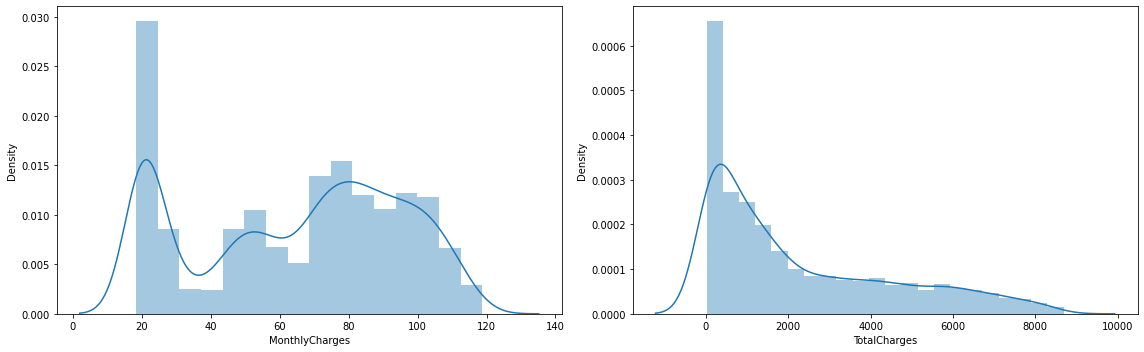

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=(16,5))
ax = ax.flatten()
for i, col in enumerate(num_col):
    sns.distplot(df_eda[col], ax=ax[i])
plt.tight_layout()

`Sedangkan berikut, mencari masing masing outliernya`

In [48]:
def outlier_analysis(data,col):
  skewness = data[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = data[col].mean() + 3*data[col].std()
    lower = data[col].mean() - 3*data[col].std()
  elif  (skewness>=0 and skewness<0.5) or (skewness>0.5 and skewness)<=1:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (1.5*IQR)
    lower = Q1 - (1.5*IQR)
  else:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (3*IQR)
    lower = Q1 - (3*IQR)
  
  no_outliers = data[(data[col]>=lower) & (data[col]<=upper)]
  outliers = data[(data[col]<lower) | (data[col]>upper)]
  print('count of outlier: ', outliers.shape[0])
  print('percentage outlier from',i,':',len(outliers)/data.shape[0] * 100, '%')
  return outliers,no_outliers, upper, lower

for i in list(df_eda[num_col].columns):
  outlier_analysis(df_eda[num_col],i)



count of outlier:  0
percentage outlier from MonthlyCharges : 0.0 %
count of outlier:  0
percentage outlier from TotalCharges : 0.0 %


`Selanjutnya visualisasi keberadaan outliernya`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


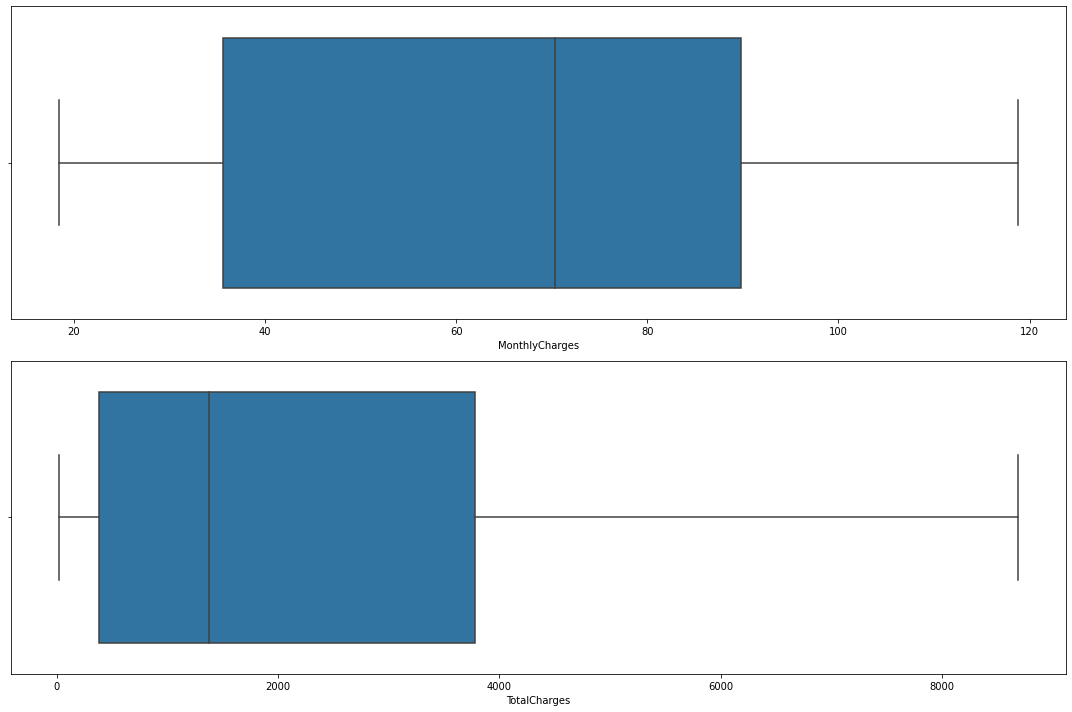

In [49]:
fig, ax = plt.subplots(nrows=2, figsize=(15,10))
ax = ax.flatten()
for i, col in enumerate(num_col):
    sns.boxplot(df_eda[col], ax=ax[i])
plt.tight_layout()

`Dilihat dari hasil visualisasinya, tidak ada outlier di kedua kolom tersebut`

#### Missing value handling

`Selanjutnya menghandle missing value yang ada di kolom total charges`

In [50]:
df_eda[num_col].head()

,MonthlyCharges,TotalCharges
0,20.45,254.50
1,19.35,847.25
2,112.75,8192.60
3,56.25,2419.55
4,31.05,347.25


In [51]:
df_eda[num_col].isnull().sum()

MonthlyCharges    0
TotalCharges      7
dtype: int64

`Selanjutnya menggunakan simple imputer untuk mengisi missing valuenya`

In [52]:
imp_num = SimpleImputer(strategy='median')

df_eda[num_col] = imp_num.fit_transform(df_eda[num_col])
df_eda[num_col].isnull().sum()

MonthlyCharges    0
TotalCharges      0
dtype: int64

`Dikarenakan kolom total charges mempunyai distribusi skew maka menggunakan strategy median`

#### Scaling

`Selanjutnya melakukan scaling untuk kolom numerikal saja`

In [53]:
scaler = StandardScaler()

df_eda[num_col] = scaler.fit_transform(df_eda[num_col])
df_eda

,gender,SeniorCitizen,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,Partner,Dependents,MultipleLines,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,13,Yes,-1.471827,-0.886208,0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Male,1,44,Yes,-1.508339,-0.625550,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0
2,Female,0,72,Yes,1.591887,2.604520,0,0.0,0.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
3,Female,0,44,Yes,-0.283517,0.065859,0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Female,0,13,No,-1.119981,-0.845421,1,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,Male,0,1,Yes,-0.514209,-0.976443,0,0.0,0.0,1.0,...,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5066,Male,0,3,No,-1.161472,-0.956611,0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5067,Female,0,12,No,-1.181388,-0.862198,1,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5068,Female,0,7,Yes,-0.530805,-0.844300,0,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Heatmap for numerikal

`Selanjutnya mencari korelasi untuk fitur numerikal dengan target`

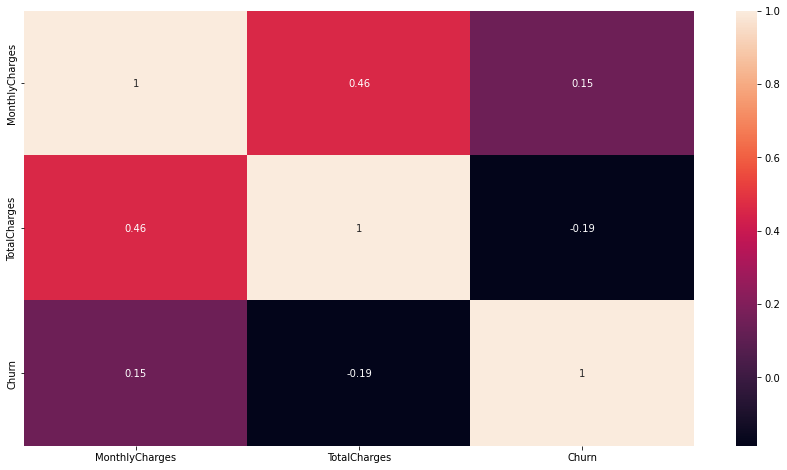

In [54]:
heat_num = ['MonthlyCharges','TotalCharges','Churn']
plt.figure(figsize=(15,8))
sns.heatmap(df_eda[heat_num].corr(method='kendall'),annot=True)

`Dilihat dari hasil korelasi kedua kolom numerikal dengan target, keduanya masih mempunyai nilai diatas 0,1 sehingga kedua kolom tersebut digunakan sebagai fitur modeling`

Berikut preprocessing yang dilakukan pada data train :

- Kolom categoric:
1. Ordinal encoding
2. One Hot Encoding
- Kolom Numeric:
1. Handle Missing value with Simple Imputer
2. Scaling pada kolom duration menggunakan Standar Scaler

## v. Data Preprocessing

`Selanjutnya menggunakan pipeline untuk preprocessing, dikarenakan agar memudahkan saat preprocessing dan hasil model ini akan dibuat deploymentnya`

### Pipeline

#### Pipeline Categorical

`Membuat pipeline yang berisi feature enginering yang telah dilakukan sebelumnya untuk kolom categorical yang sudah dipilih fiturnya`

In [55]:
cat_1_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[['No','Yes'],['No','Yes'],['No phone service','No','Yes'],['No','DSL','Fiber optic'],['No internet service','No','Yes'],
                                                   ['No internet service','No','Yes'],['No internet service','No','Yes'],['No internet service','No','Yes'],['No internet service','No','Yes'],
                                                   ['No internet service','No','Yes'],['Month-to-month','One year','Two year'],['No','Yes']]))
    ])

cat_1_tr = cat_1_pipeline.fit(X_train[[ 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling']])
cat_1_tr

Pipeline(steps=[('ordinal_enc',
                 OrdinalEncoder(categories=[['No', 'Yes'], ['No', 'Yes'],
                                            ['No phone service', 'No', 'Yes'],
                                            ['No', 'DSL', 'Fiber optic'],
                                            ['No internet service', 'No',
                                             'Yes'],
                                            ['No internet service', 'No',
                                             'Yes'],
                                            ['No internet service', 'No',
                                             'Yes'],
                                            ['No internet service', 'No',
                                             'Yes'],
                                            ['No internet service', 'No',
                                             'Yes'],
                                            ['No internet service', 'No',
                                

In [56]:
cat_2_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

cat_2_tr = cat_2_pipeline.fit(X_train[['PaymentMethod']])
cat_2_tr

Pipeline(steps=[('ohe_enc',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

#### Pipeline Numerical

`Membuat pipeline yang berisi feature enginering yang telah dilakukan sebelumnya untuk kolom numerikal yang sudah dipilih fiturnya`

In [57]:
num_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('imputer',SimpleImputer(strategy='median'))
    ])

num_tr = num_pipeline.fit(X_train[['MonthlyCharges','TotalCharges']])
num_tr

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median'))])

### Pipeline Preprocessing

#### Pipeline Unbalance

`Setelah membuat masing pipeline untuk kolom numerikal dan kategorikal, selanjutnya menggabungkan ketiga pipeline yang sudah dibuat menjadi satu. Lalu dilatih dengan data training`

In [58]:
unbalance_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['MonthlyCharges','TotalCharges']),
        ("cat_ord", cat_1_pipeline, [ 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling']),
        ("cat_ohe", cat_2_pipeline, ['PaymentMethod']),
    ])

In [59]:
unbalance_pipeline.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['MonthlyCharges', 'TotalCharges']),
                                ('cat_ord',
                                 Pipeline(steps=[('ordinal_enc',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No '
                                                                              'phone '
                                           

`Selanjutnya pipeline tersebut dimasukan ke dalam data validasi`

In [60]:
val_tr = unbalance_pipeline.transform(X_val)
val_tr

array([[-1.47846535, -0.91627362,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.74214639, -0.91732838,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70729374,  0.56281943,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.13969343,  0.07501098,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.68515263, -0.95736564,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.15207995,  1.57807803,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

`Selanjutnya pipeline tersebut dimasukan ke dalam data test`

In [61]:
test_tr = unbalance_pipeline.transform(X_test)
test_tr

array([[ 1.1504203 ,  2.08166405,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.65418494,  1.28425909,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50481644, -0.54569829,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.4259222 ,  1.14784236,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20773908,  0.51588223,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.69401654,  1.03063122,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

`Selanjutnya membuat pipeline yang berisi seluruh preprocessing yang telah dibuat sebelumnya lalu ditambahkan dengan handle imbalance data menggunakan SMOTENC dengan strategy minority agar data targetnya balance dengan cara oversampling`

In [62]:
balance_pipeline = imbpipe([
        ("preprocessing", unbalance_pipeline),
        ("cat_ord", SMOTENC(categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],sampling_strategy='minority',k_neighbors = 5,random_state=33)),
    ])

`Pipeline tersebut digunakan hanya untuk data train saja`

In [63]:
X_train_resampled,y_train_resampled = balance_pipeline.fit_resample(X_train,y_train)

In [64]:
X_train_resampled.shape

(7450, 18)

## vi. Model Definition

`Selanjutnya membuat pipeline untuk model deep learnign atau ANN`

In [65]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_resampled, y_train_resampled))
## Shuffle and slice train dataset.
train_dataset = train_dataset.shuffle(buffer_size=7450).batch(16)

val_dataset = tf.data.Dataset.from_tensor_slices((val_tr, y_val))
val_dataset = val_dataset.batch(16)

## Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((test_tr, y_test))
test_dataset = test_dataset.batch(16)

`Selanjutnya mencari jumlah hidden layer berdasarkan dibawah ini`

Penentuan jumlah neuron di hidden layer

Nh=Ns(α∗(Ni+No)) 

𝑁𝑖 = number of input neurons.

𝑁𝑜 = number of output neurons.

𝑁𝑠 = number of samples in training data set.

𝛼 = an arbitrary scaling factor usually 2-10.

Referensi: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [66]:
hid = int(len(X_train_resampled)/(10*(18+1)))

In [67]:
hid

39

`Dengan menggunakan alpha 10 maka didapatkan hiden layer yang digunakan sebanyak 39 neuron`

`Selanjutnya membuat model sequantial untuk ANN`

In [68]:
#Sequential
modelsq1 = Sequential()
modelsq1 = tf.keras.models.Sequential()
modelsq1.add(tf.keras.layers.Dense(units=18, activation='relu', input_shape = (X_train_resampled.shape[1],)))
modelsq1.add(tf.keras.layers.Dense(units=39, activation='relu'))
modelsq1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
modelsq1.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

`Selanjutnya membuat model sequantial untuk ANN yang sudah diimprovement`

In [85]:
#Sequential
modelsq2 = Sequential()
modelsq2 = tf.keras.models.Sequential()
modelsq2.add(tf.keras.layers.Dense(units=18, activation='relu', input_shape = (X_train_resampled.shape[1],), kernel_initializer='HeNormal',kernel_regularizer='l2'))
modelsq2.add(tf.keras.layers.BatchNormalization())
modelsq2.add(tf.keras.layers.Dense(units=39, activation='relu'))
modelsq2.add(tf.keras.layers.BatchNormalization())
modelsq2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
modelsq2.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

`Selanjutnya membuat model functional untuk ANN`

In [70]:
#Functional
input_lyr_f1 = tf.keras.layers.Input(shape=(X_train_resampled.shape[1],))
layers = tf.keras.layers.Dense(18, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_lyr_f1)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(39, kernel_initializer='HeNormal',activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output_lyr_f1 = tf.keras.layers.Dense(1, kernel_initializer='HeNormal',activation='sigmoid')(layers)

model_func1 = tf.keras.models.Model(inputs=input_lyr_f1,outputs = output_lyr_f1)
model_func1.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy'])

`Selanjutnya membuat model functional untuk ANN yang sudah diimprovement`

In [71]:
#Functional
input_lyr_f2 = tf.keras.layers.Input(shape=(X_train_resampled.shape[1],))
layers = tf.keras.layers.Dense(18, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_lyr_f2)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(9 , kernel_initializer='HeNormal',activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output_lyr_f2 = tf.keras.layers.Dense(1, kernel_initializer='HeNormal',activation='sigmoid')(layers)

model_func2 = tf.keras.models.Model(inputs=input_lyr_f2,outputs = output_lyr_f2)
model_func2.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy'])


`Selanjutnya mencari model total parameter yang digunakan pada model sequantial`

In [72]:
modelsq1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 39)                741       
                                                                 
 dense_2 (Dense)             (None, 1)                 40        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


`Pada model sequantial mengguanakan parameter dengan total sebanyak 1123`

`Selanjutnya mencari model total parameter yang digunakan pada model sequantial yang telah diimprovement`

In [86]:
modelsq2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 batch_normalization (BatchN  (None, 18)               72        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 39)                741       
                                                                 
 batch_normalization_1 (Batc  (None, 39)               156       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 40        
                                                                 
Total params: 1,351
Trainable params: 1,237
Non-traina

`Pada model sequantial yang telah diimprovement mengguanakan parameter dengan total sebanyak 1351 dengan non trainable paramsnya 114`

`Selanjutnya mencari model total parameter yang digunakan pada model functional`

In [74]:
model_func1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_6 (Dense)             (None, 18)                342       
                                                                 
 batch_normalization (BatchN  (None, 18)               72        
 ormalization)                                                   
                                                                 
 dense_7 (Dense)             (None, 39)                741       
                                                                 
 batch_normalization_1 (Batc  (None, 39)               156       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 39)                0     

`Pada model functional mengguanakan parameter dengan total sebanyak 1351 dengan non trainable paramsnya 114`

`Selanjutnya mencari model total parameter yang digunakan pada model sequantial yang telah diimprovement`

In [75]:
model_func2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_9 (Dense)             (None, 18)                342       
                                                                 
 batch_normalization_2 (Batc  (None, 18)               72        
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 9)                 171       
                                                                 
 batch_normalization_3 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0   

`Pada model functional mengguanakan parameter dengan total sebanyak 631 dengan non trainable paramsnya 54`

## vii. Model Training

`Selanjutnya melakukan training pada model sequantial menggunakan pipeline yang telah dibuat dengan epoch sebanyak 40 kali`

In [76]:
history_sq1 = modelsq1.fit(train_dataset, epochs=40, validation_data=val_dataset)

Epoch 1/40
466/466 [==============================] - 3s 4ms/step - loss: 0.5039 - accuracy: 0.7654 - val_loss: 0.4721 - val_accuracy: 0.7563
Epoch 2/40
466/466 [==============================] - 2s 3ms/step - loss: 0.4638 - accuracy: 0.7824 - val_loss: 0.4560 - val_accuracy: 0.7697
Epoch 3/40
466/466 [==============================] - 1s 3ms/step - loss: 0.4548 - accuracy: 0.7891 - val_loss: 0.4367 - val_accuracy: 0.7815
Epoch 4/40
466/466 [==============================] - 2s 3ms/step - loss: 0.4518 - accuracy: 0.7852 - val_loss: 0.4252 - val_accuracy: 0.7855
Epoch 5/40
466/466 [==============================] - 2s 3ms/step - loss: 0.4480 - accuracy: 0.7863 - val_loss: 0.4491 - val_accuracy: 0.7539
Epoch 6/40
466/466 [==============================] - 2s 3ms/step - loss: 0.4463 - accuracy: 0.7930 - val_loss: 0.4528 - val_accuracy: 0.7729
Epoch 7/40
466/466 [==============================] - 1s 3ms/step - loss: 0.4432 - accuracy: 0.7890 - val_loss: 0.4654 - val_accuracy: 0.7532
Epoch 

`Selanjutnya melakukan training pada model sequantial yang telah diimprovement menggunakan pipeline yang telah dibuat dengan epoch sebanyak 40 kali`

In [87]:
history_sq2 = modelsq2.fit(train_dataset, epochs=40, validation_data=val_dataset)

Epoch 1/40
466/466 [==============================] - 3s 4ms/step - loss: 0.8185 - accuracy: 0.7357 - val_loss: 0.6724 - val_accuracy: 0.7681
Epoch 2/40
466/466 [==============================] - 2s 3ms/step - loss: 0.6533 - accuracy: 0.7681 - val_loss: 0.6224 - val_accuracy: 0.7579
Epoch 3/40
466/466 [==============================] - 2s 3ms/step - loss: 0.5819 - accuracy: 0.7728 - val_loss: 0.5751 - val_accuracy: 0.7500
Epoch 4/40
466/466 [==============================] - 2s 3ms/step - loss: 0.5564 - accuracy: 0.7761 - val_loss: 0.5501 - val_accuracy: 0.7437
Epoch 5/40
466/466 [==============================] - 2s 3ms/step - loss: 0.5279 - accuracy: 0.7780 - val_loss: 0.5161 - val_accuracy: 0.7729
Epoch 6/40
466/466 [==============================] - 2s 3ms/step - loss: 0.5182 - accuracy: 0.7756 - val_loss: 0.5597 - val_accuracy: 0.7405
Epoch 7/40
466/466 [==============================] - 2s 3ms/step - loss: 0.4976 - accuracy: 0.7894 - val_loss: 0.5057 - val_accuracy: 0.7610
Epoch 

`Selanjutnya melakukan training pada model functional menggunakan pipeline yang telah dibuat dengan epoch sebanyak 40 kali`

In [78]:
history_fc1 = model_func1.fit(train_dataset, epochs=40, validation_data=val_dataset)

Epoch 1/40
466/466 [==============================] - 3s 4ms/step - loss: 0.9153 - accuracy: 0.7021 - val_loss: 0.8320 - val_accuracy: 0.7547
Epoch 2/40
466/466 [==============================] - 2s 3ms/step - loss: 0.8161 - accuracy: 0.7532 - val_loss: 0.8104 - val_accuracy: 0.7563
Epoch 3/40
466/466 [==============================] - 2s 3ms/step - loss: 0.7758 - accuracy: 0.7553 - val_loss: 0.7614 - val_accuracy: 0.7610
Epoch 4/40
466/466 [==============================] - 2s 3ms/step - loss: 0.7420 - accuracy: 0.7638 - val_loss: 0.7302 - val_accuracy: 0.7697
Epoch 5/40
466/466 [==============================] - 2s 4ms/step - loss: 0.7155 - accuracy: 0.7599 - val_loss: 0.7113 - val_accuracy: 0.7595
Epoch 6/40
466/466 [==============================] - 2s 4ms/step - loss: 0.6913 - accuracy: 0.7697 - val_loss: 0.6850 - val_accuracy: 0.7626
Epoch 7/40
466/466 [==============================] - 2s 4ms/step - loss: 0.6669 - accuracy: 0.7779 - val_loss: 0.6804 - val_accuracy: 0.7516
Epoch 

`Selanjutnya melakukan training pada model functional yang telah diimprovement menggunakan pipeline yang telah dibuat dengan epoch sebanyak 40 kali`

In [79]:
history_fc2 = model_func2.fit(train_dataset, epochs=40, validation_data=val_dataset)

Epoch 1/40
466/466 [==============================] - 3s 5ms/step - loss: 0.9553 - accuracy: 0.6934 - val_loss: 0.9060 - val_accuracy: 0.7271
Epoch 2/40
466/466 [==============================] - 2s 3ms/step - loss: 0.8517 - accuracy: 0.7361 - val_loss: 0.8446 - val_accuracy: 0.7437
Epoch 3/40
466/466 [==============================] - 2s 3ms/step - loss: 0.7959 - accuracy: 0.7507 - val_loss: 0.7883 - val_accuracy: 0.7453
Epoch 4/40
466/466 [==============================] - 2s 4ms/step - loss: 0.7578 - accuracy: 0.7550 - val_loss: 0.7440 - val_accuracy: 0.7461
Epoch 5/40
466/466 [==============================] - 2s 3ms/step - loss: 0.7203 - accuracy: 0.7648 - val_loss: 0.7072 - val_accuracy: 0.7524
Epoch 6/40
466/466 [==============================] - 2s 4ms/step - loss: 0.6953 - accuracy: 0.7671 - val_loss: 0.7019 - val_accuracy: 0.7476
Epoch 7/40
466/466 [==============================] - 2s 3ms/step - loss: 0.6727 - accuracy: 0.7651 - val_loss: 0.6687 - val_accuracy: 0.7532
Epoch 

`Selanjutnya membersihkan memori setelah training model`

In [80]:
keras.backend.clear_session()

## viii. Model Evaluation

`Selanjutnya memvisualisasi hasil pelatihan model sequantial dengan data validasi`

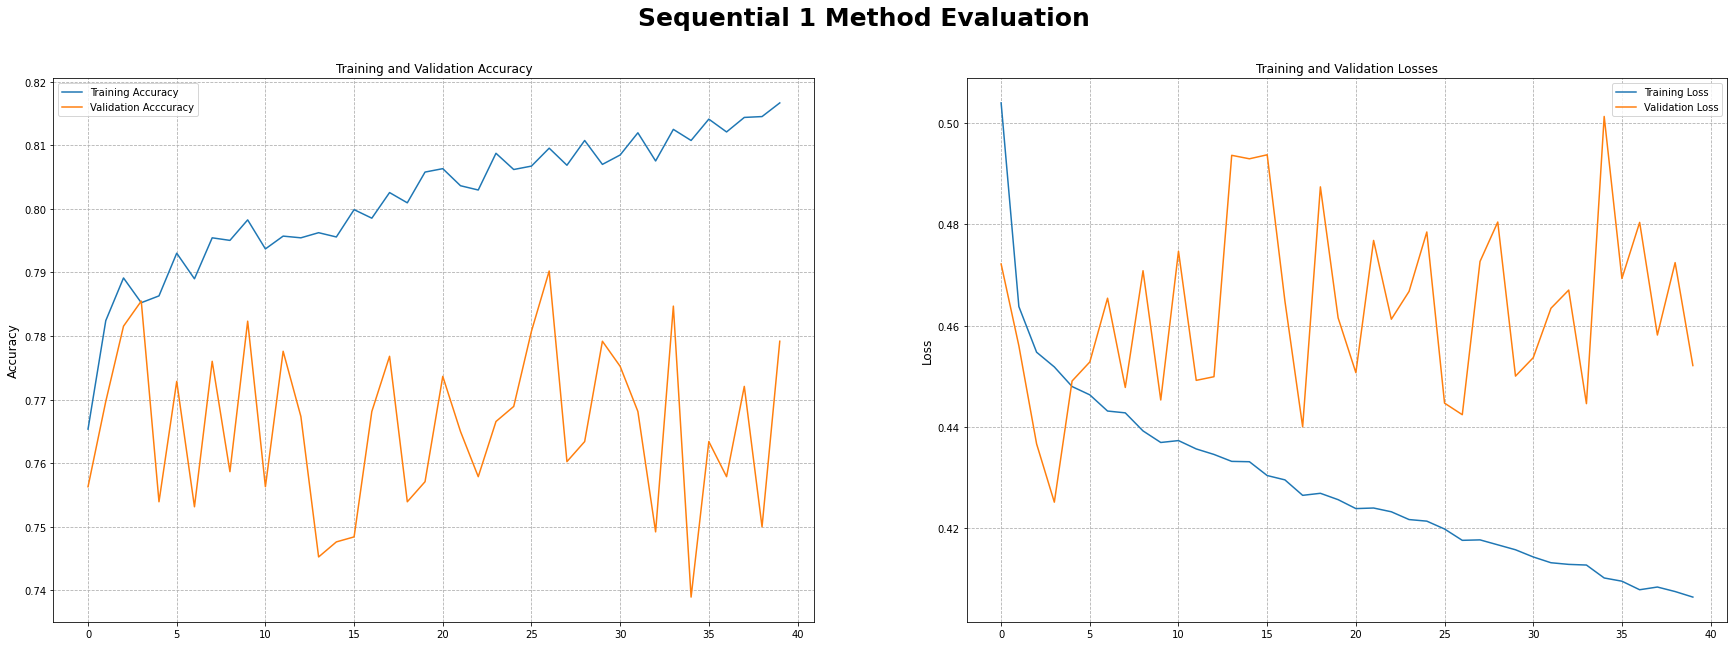

In [81]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential 1 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_sq1.history['accuracy'],label="Training Accuracy")
plt.plot(history_sq1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_sq1.history['loss'], label="Training Loss")
plt.plot(history_sq1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

`Dilihat dari hasilnya, model tersebut masih dikatakan overfit dan exploding gradient`

`Selanjutnya memvisualisasi hasil pelatihan model sequantial yang telah diimprovement dengan data validasi`

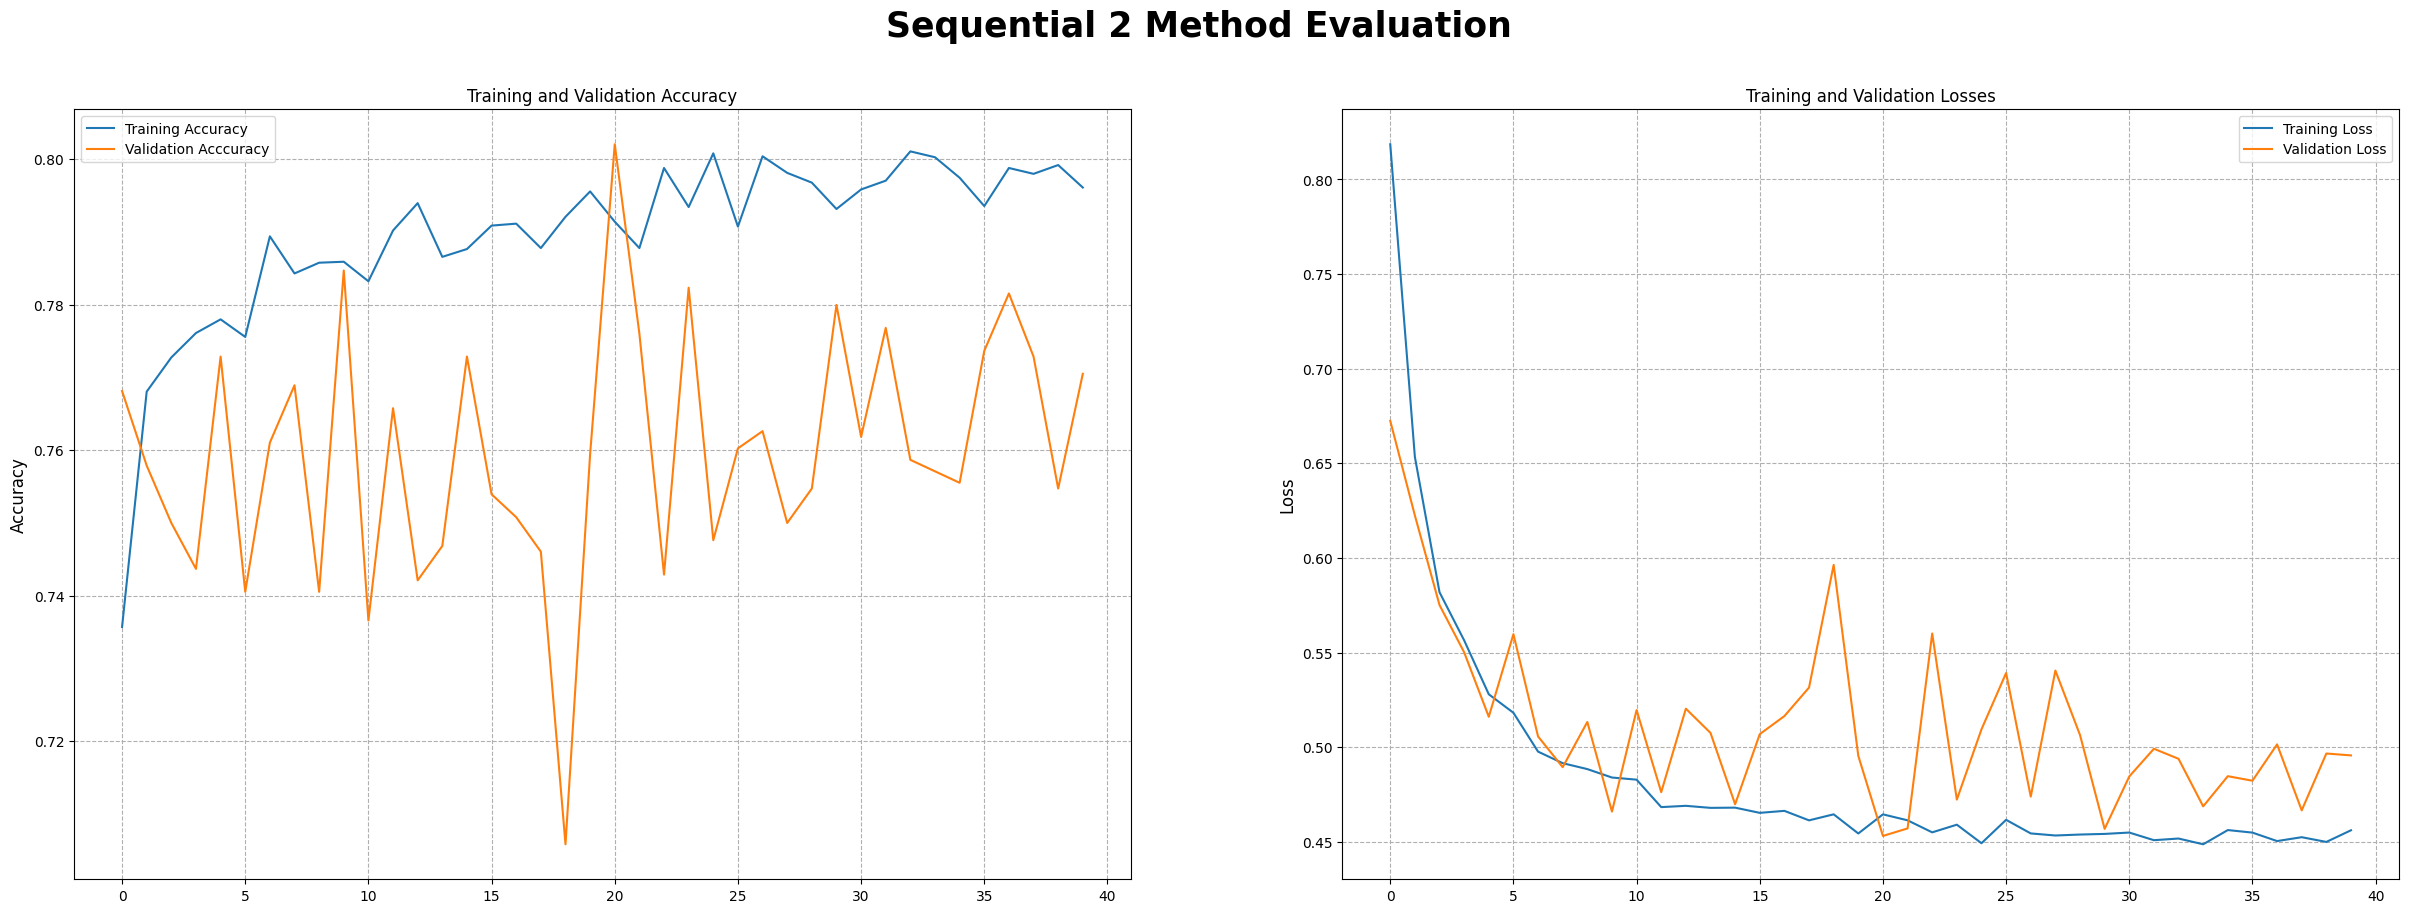

In [88]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential 2 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_sq2.history['accuracy'],label="Training Accuracy")
plt.plot(history_sq2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_sq2.history['loss'], label="Training Loss")
plt.plot(history_sq2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

`Dilihat dari hasilnya, model sequantial yang telah diimprovement sudah tidak overfit namun masih ada exploding gradientnya`

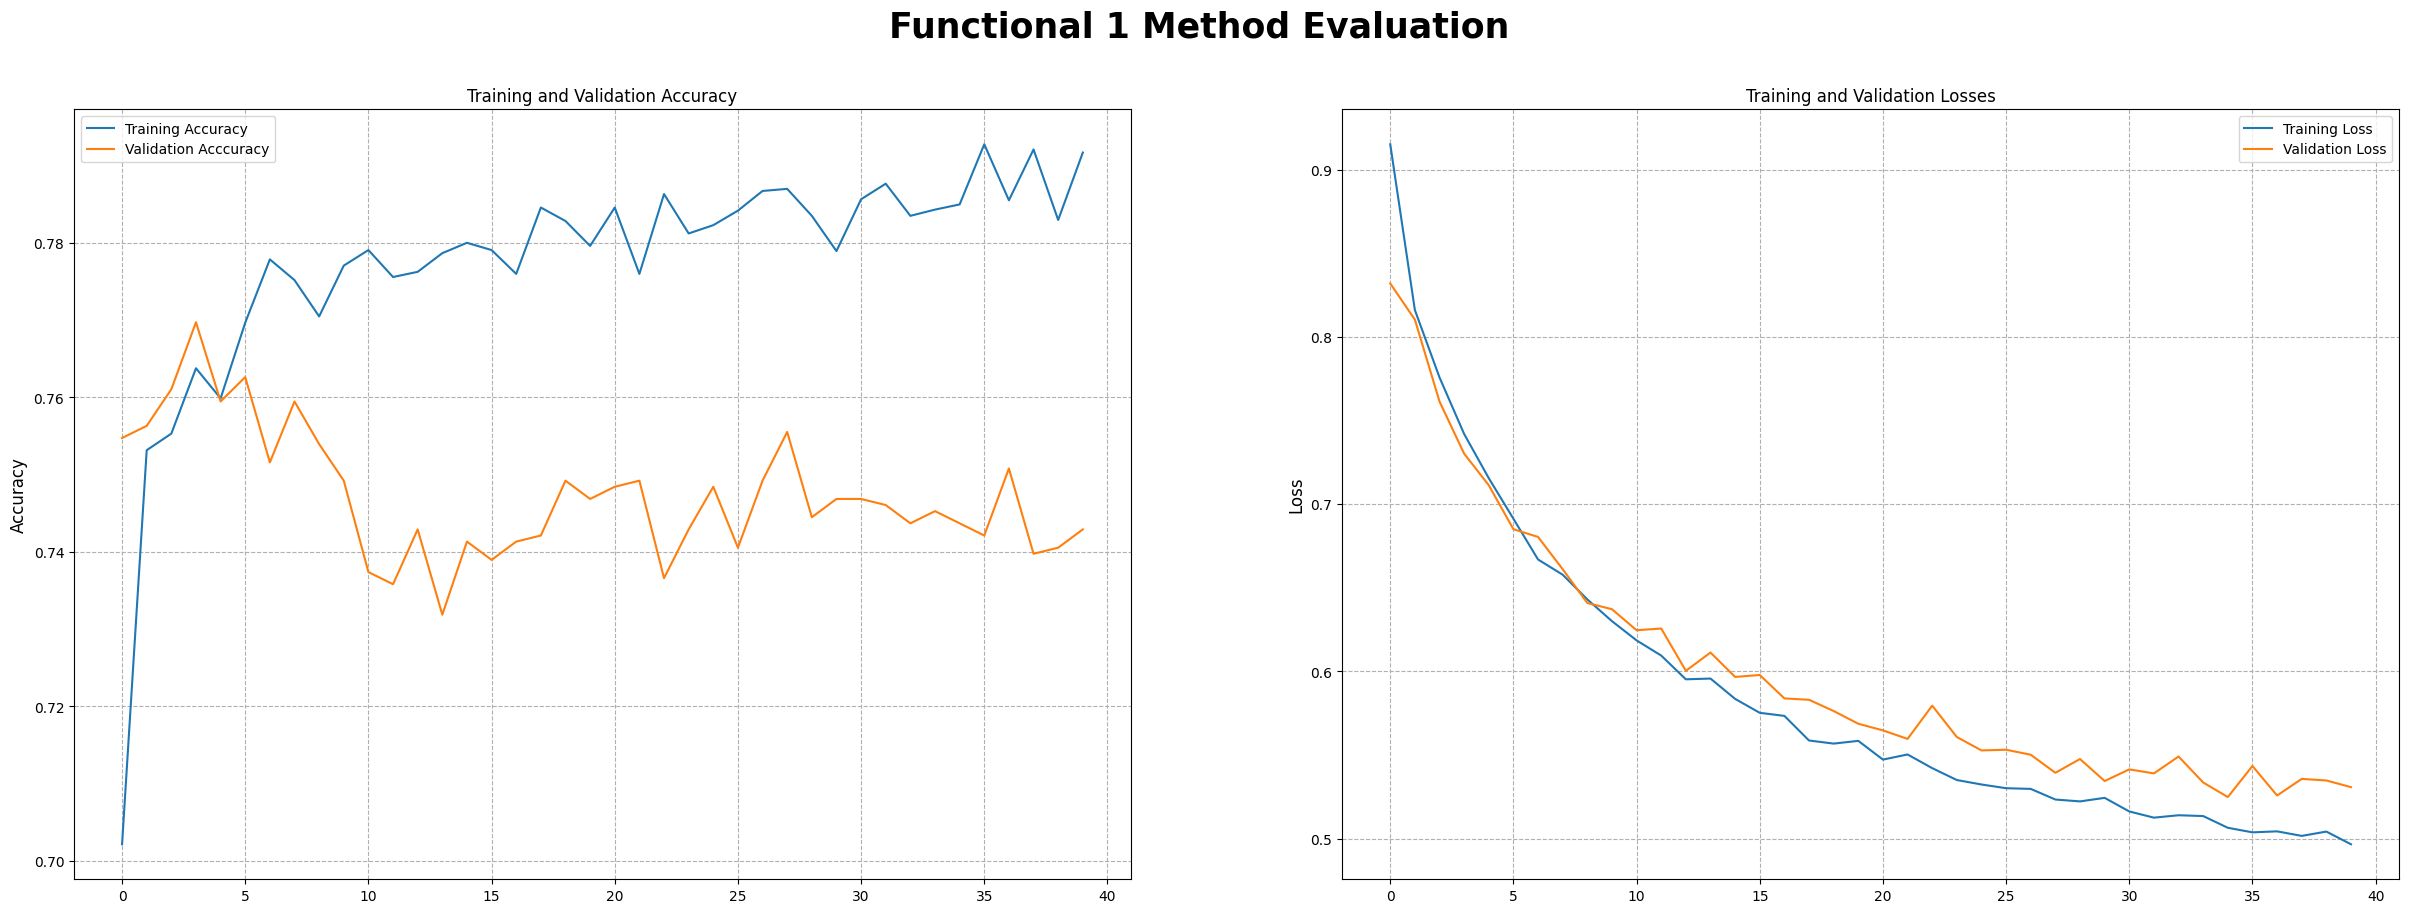

In [83]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional 1 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_fc1.history['accuracy'],label="Training Accuracy")
plt.plot(history_fc1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_fc1.history['loss'], label="Training Loss")
plt.plot(history_fc1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

`Dilihat dari hasilnya, model fucntional tersebut sudah tidak exploding gradient tetapi memiliki model yang overfit`

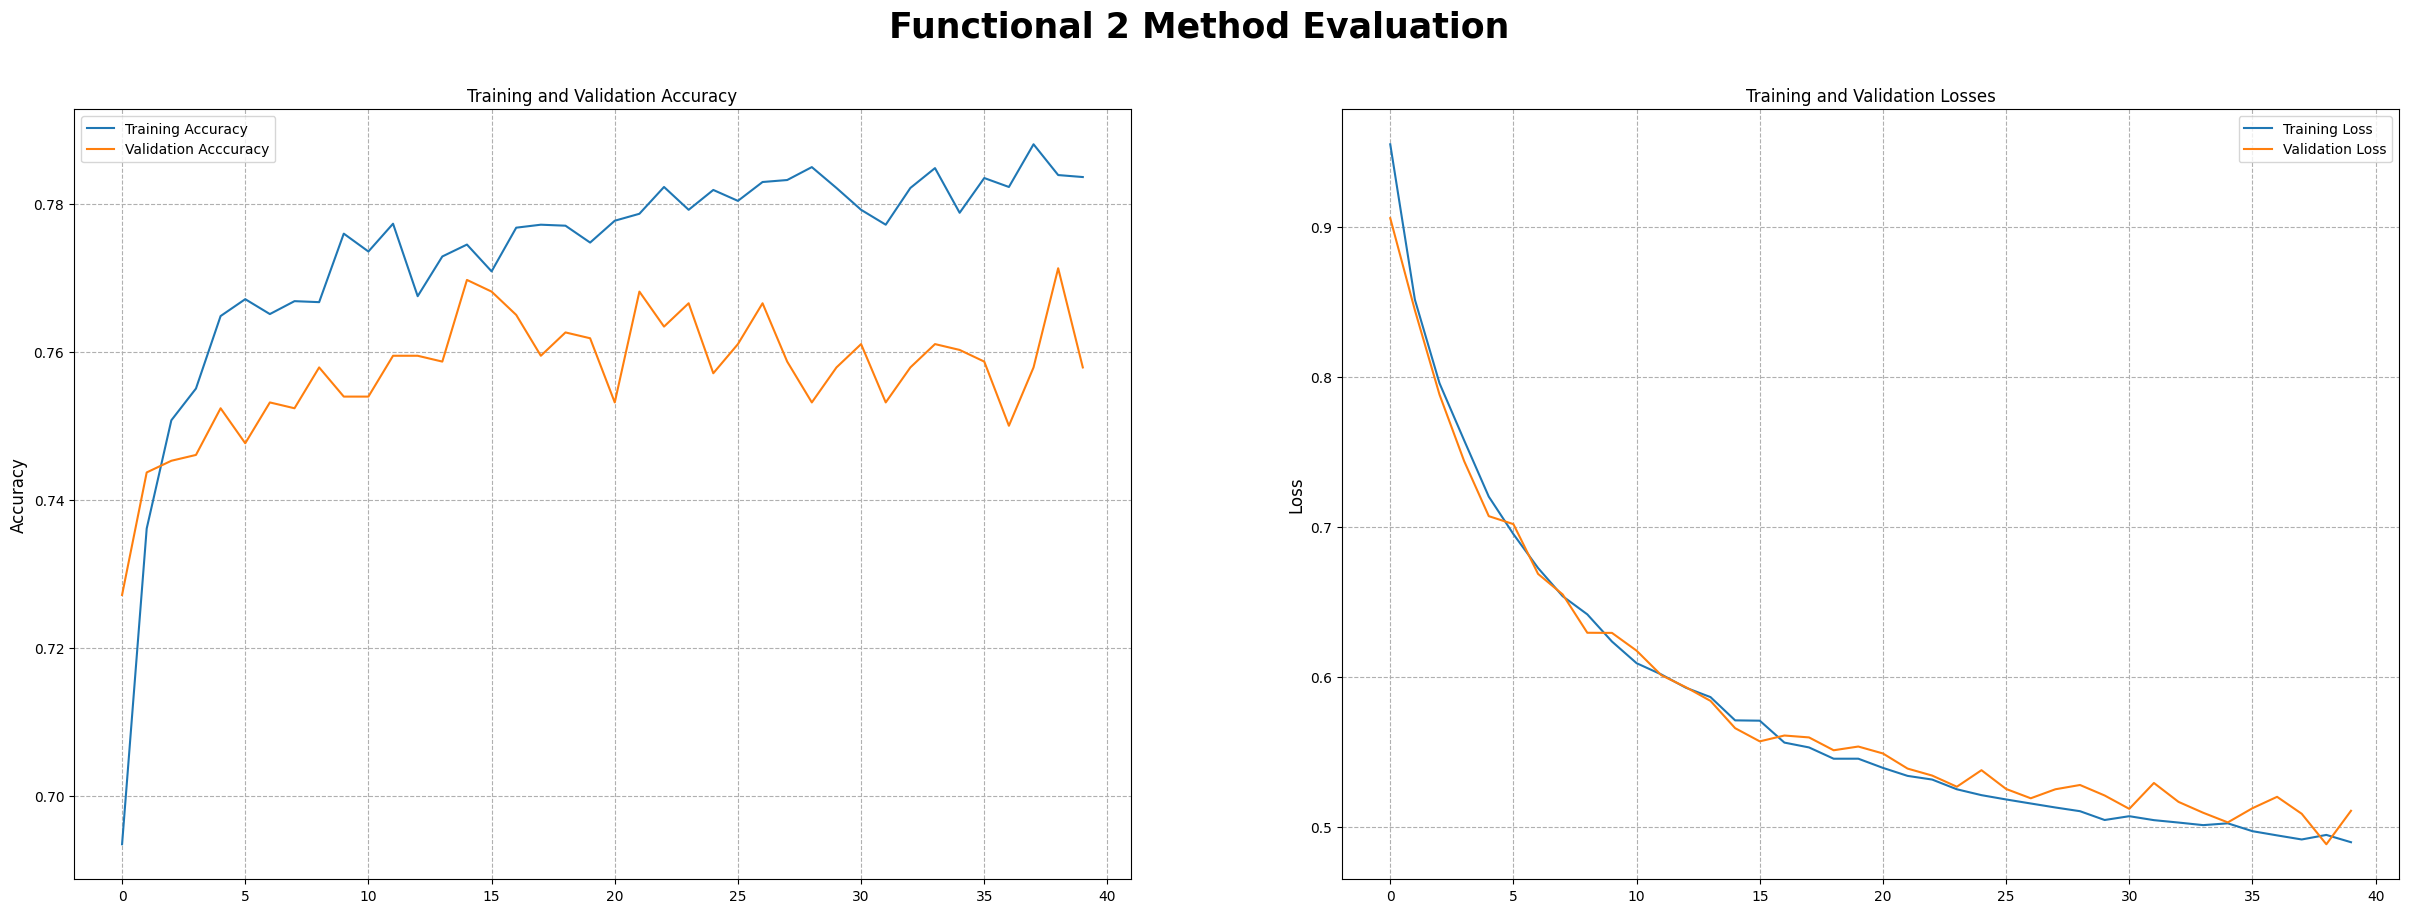

In [84]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional 2 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_fc2.history['accuracy'],label="Training Accuracy")
plt.plot(history_fc2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_fc2.history['loss'], label="Training Loss")
plt.plot(history_fc2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

`Selanjutnya, model functional yang telah diimprovement tersebut sudah cukup baik dibanding yang lainnya dikarenakan sudah bestfit dan tidak ada exploding gradient`

In [91]:
results = model_func2.evaluate(test_dataset)
print(f'Testing Loss     : {results[0]:.4f}')
print(f'Testing Accuracy : {results[1]:.4f}')

45/45 [==============================] - 0s 4ms/step - loss: 0.5269 - accuracy: 0.7489
Testing Loss     : 0.5269
Testing Accuracy : 0.7489


`Dilihat dari hasil model, nilai accuracy dan loss terhadap data testing sudah cukup baik`

23/23 [==============================] - 0s 3ms/step
[[392 126]
 [ 51 136]]


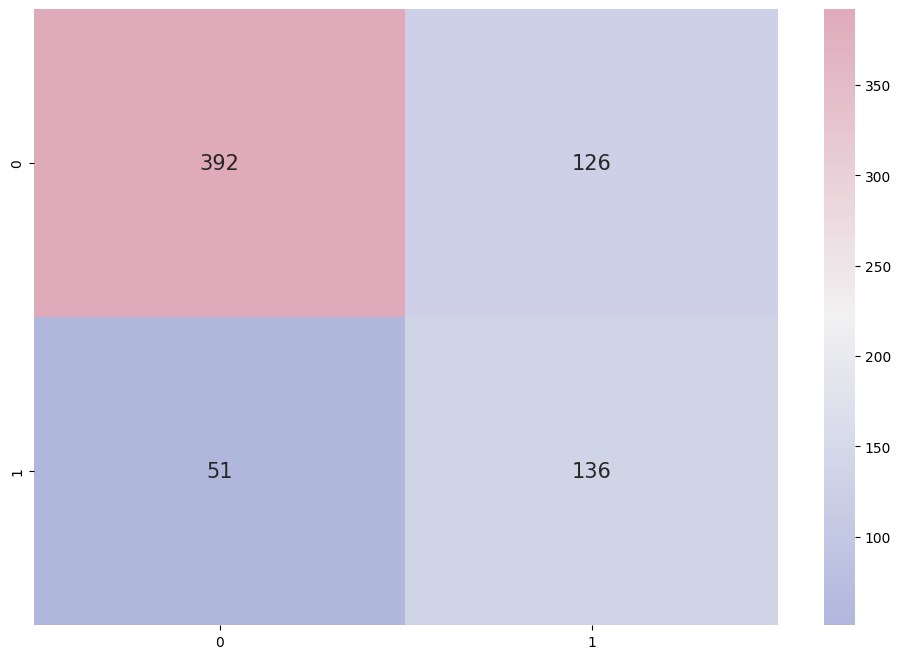

In [90]:
# predict probabilities
y_pred = model_func2.predict(test_tr)

# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred.round())
print(cf_matrix)
##persentase
# sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15});
sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':15}, fmt='g');

`Dilihat dari hasil confusion matrixnya juga sudah cukup baik, dapat menebak dengan benar sebanyak 528 dari 704 data atau 0,75%` 

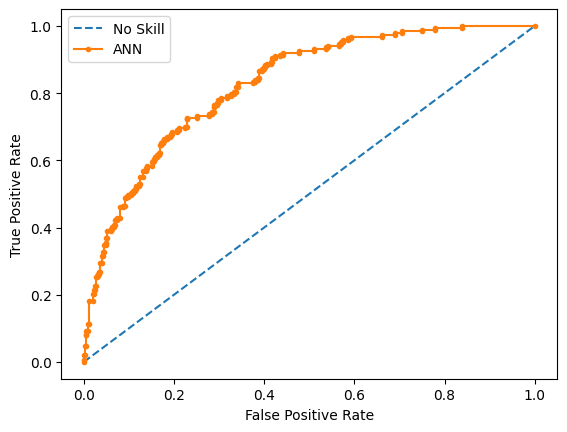

AUC score: 0.8272252389899447


In [93]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test,y_pred)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {auc}')

`Dan juga jika dilihat dari nilai AUC scorenya sudah diatas 0,8 yang berarti sudahh cukup baik modelnya`

## ix. Model Saving

`Selanjutnya menyimpan pipeline preprocessing dan model untuk diterapkan pada deployment`

In [107]:
with open("pipeline.pkl", "wb") as f:
    pickle.dump(unbalance_pipeline, f)

In [108]:
model_func2.save('model.h5')

## x. Model Inference

In [122]:
import sklearn
print(tf.__version__)
print(sklearn.__version__)
print(np.__version__)

2.9.2
1.0.2
1.21.6


`Sealnjutnya membuat data 1 baris sebagai data inference untuk membuktikan model tersebut sudah bisa diimplementasikan ke data aslinya atau belum`

In [100]:
df_inf = {'gender':'Female',
 'SeniorCitizen':0,
 'Partner':'Yes',
 'Dependents':'Yes',
 'tenure':10,
 'PhoneService':'Yes',
 'MultipleLines':'No',
 'InternetService':'No',
 'OnlineSecurity':'No internet service',
 'OnlineBackup':'No internet service',
 'DeviceProtection':'No internet service',
 'TechSupport':'No internet service',
 'StreamingTV':'No internet service',
 'StreamingMovies':'No internet service',
 'Contract':'Month-to-month',
 'PaperlessBilling':'Yes',
 'PaymentMethod':'Mailed check',
 'MonthlyCharges':21.25,
 'TotalCharges':300.50}

df_inf = pd.DataFrame([df_inf])
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,Yes,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,21.25,300.5


`Setelah dibuat dataframenya, selanjutnya dilakukan preprocessing menggunakan pipeline`

In [104]:
df_inf=unbalance_pipeline.transform(df_inf)
df_inf

array([[-1.44527235, -0.86601829,  1.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ]])

`Selanjutnya memuat model yang telah disimpan sebelumnya`

In [109]:
with open("pipeline.pkl", "rb") as f:
    pipe_branch = pickle.load(f)

In [110]:
load_model_func = load_model('model.h5')

`Selanjutnya memprediksi data inference`

In [121]:
pred_inf =int(np.round(load_model_func.predict(df_inf)[0][0]))
pred_inf

1/1 [==============================] - 0s 161ms/step


0

`Dari hasil diatas, model sudah dapat memprediksi atau sudah dapat diimplementasikan pada deployment`

## xi. Kesimpulan

`Berdasarkan analisis dan overview yang didapat:`

- Baris dan kolom pada data flight price sebanyak 7043 baris dan 20 kolom
- Pada data Telco Customer Churn tidak mempunyai duplicate data tetapi mempunyai missing value sebanyak 11 baris pada kolom total charges
- Kolom tenure merupakan kolom kategorikal dikarenakan unique valuenya berisi mengenai jumlah pelanggan yang telah meninggalkan perusahaan
- Pada kolom target mempunyai data yang imbalance dengan perbandingan 70:30 
- Metode pembayaran dengan elektronik check menjadi metode pembayaran yang paling sering digunakan pada customer yang churn
- Jenis kelamin laki laki maupun perempuan mempunyai jumlah yang sama berdasarkan churnnya. Jika dilihat hasil EDAnya Kolom gender tidak mempengaruhi seseorang tersebut churn atau tidak
- Contract month to month adalah yang paling sering muncul baik seseorang tersebut churn atau tidak
- Internet service fiber optic yang paling sering digunakan dibanding yang lainnya
- Dari hasil evaluasi 4 model yang telah dibuat, model functional yang telah diimprovement adalah model yang paling bagus. Dikarenakan pada model tersebut sudah bestfit dan tidak mengalami exploding maupun vanishing vanishing
- Model yang terbaik tersebut diuji coba menggunakan data testing, didapatkan nilai lossnya 0.5269, accuracy sebesar 0.7489, dan AUC scorenya 0.8272
- Pipeline yang digunakan untuk model ANN adalah buffer size sebesar 7450 sesuai dengan baris data train dan batch sebanyak 16.
- Dapat disimpulan model functional yang telah diimprovement dengan menggunakan input layernya sebanyak 18 neuron, hidden layernya sebanyak 9 neuron dan output layernya sebanyak 1 neuron seusai dengan outputnya. Fungsi aktivasi yang digunakan adalah relu untuk input layer dan hidden layer, sedangkan sigmoid untuk output layer. Model tersebut dicompile menggunakan AdaMax sebagai optimizernya. Diantara hidden layer dengan input layer maupun output layer terdapat batch normalization dan drop out, agar tidak terjadinya exploding dan overfitting  